In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import gridspec
import h5py
import matplotlib.ticker as tck

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy import units as u

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.handlelength']=2
mpl.rcParams['legend.fontsize']=16
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
mpl.rcParams['legend.labelspacing'] = 0.1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.direction'] = 'inout'

In [2]:
#set SNOwGLoBES detector to use
detectors = ["wc100kt30prct","scint20kt","ar40kt","icecube"]

#set SNEWPY model type and filename
modeltype = 'OConnor_2015'

#copying the setup for the generated data in the tables above
window_tstart = 0.5300223
window_tend = 0.5598223
window_bins = 299
tstart = np.linspace(window_tstart,window_tend,window_bins,endpoint=True)*u.s
tend = tstart + (window_tend-window_tstart)/window_bins*u.s
tmid = (tstart+tend)*0.5

#set desired oscillation prescription
transformation = 'AdiabaticMSW_NMO'

In [3]:
data = np.loadtxt("./s40_atBH_10km.dat",skiprows=1,unpack=True)
SG_times = data[0]
SG_data_10km = []
SG_data_10km.append(data[1])
SG_data_10km.append(data[2])
SG_data_10km.append(data[3])
SG_data_10km.append(data[4])
SG_data_10km.append(data[5])
SG_data_10km.append(data[6])

data = np.loadtxt("./s40_atBH_35km.dat",skiprows=1,unpack=True)
SG_data_35km = []
SG_data_35km.append(data[1])
SG_data_35km.append(data[2])
SG_data_35km.append(data[3])

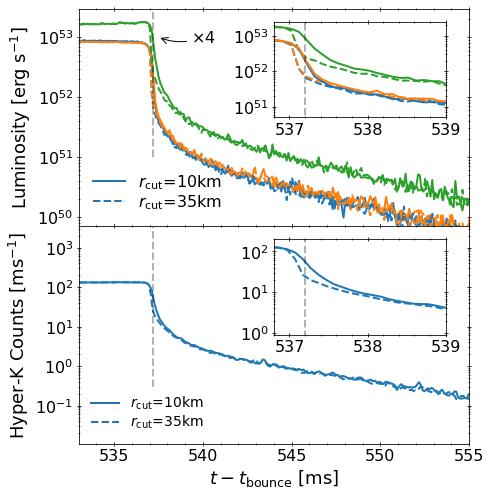

Total Events Hyper-K-like: 36.06322861075721
Total Events Hyper-K-like: 30.516692861149142


In [4]:
nevents_10km = {}
model = 's40_atBH_10km'
outfile = modeltype+"_"+model+"_"+transformation
tables_10km = np.load('./NeutrinoEcho_'+outfile+'.npy',allow_pickle=True).item()
for detector in detectors:
    nevents_10km[detector] = np.zeros(len(tmid))
    for i in range(len(tmid)):
        key = "Collated_"+outfile+"_"+str(i)+"_"+detector+"_events_smeared_weighted.dat"
        for j in range(1,len(tables_10km[detector][key]['header'].split())):
            nevents_10km[detector][i] += sum(tables_10km[detector][key]['data'][j])
            
            
nevents_35km = {}
model = 's40_atBH_35km'
outfile = modeltype+"_"+model+"_"+transformation
tables_35km = np.load('./NeutrinoEcho_'+outfile+'.npy',allow_pickle=True).item()
for detector in detectors:
    nevents_35km[detector] = np.zeros(len(tmid))
    for i in range(len(tmid)):
        key = "Collated_"+outfile+"_"+str(i)+"_"+detector+"_events_smeared_weighted.dat"
        for j in range(1,len(tables_35km[detector][key]['header'].split())):
            nevents_35km[detector][i] += sum(tables_35km[detector][key]['data'][j])


#nevents is per bin, convert to per ms
factor = window_bins/(window_tend-window_tstart)/1000.

hyperKfactor = 2.2
superKfactor = 0.32

tbh = 537

total_hk_10km = sum(hyperKfactor*nevents_10km["wc100kt30prct"])
dwisum_hk_10km = total_hk_10km-np.cumsum(hyperKfactor*nevents_10km["wc100kt30prct"])

total_hk_35km = sum(hyperKfactor*nevents_35km["wc100kt30prct"])
dwisum_hk_35km = total_hk_35km-np.cumsum(hyperKfactor*nevents_35km["wc100kt30prct"])

fig = plt.figure(figsize=(7,8))
gs = gridspec.GridSpec(2, 1,hspace=0.0) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax2.plot(tmid*1000,hyperKfactor*nevents_10km["wc100kt30prct"]*factor,label=r"$r_\mathrm{cut}$=10km")
ax2.plot(tmid*1000,hyperKfactor*nevents_35km["wc100kt30prct"]*factor,'C0--',label=r"$r_\mathrm{cut}$=35km")
ins = ax2.inset_axes([0.5,0.5,0.44,0.44])
ins.plot(tmid*1000,hyperKfactor*nevents_10km["wc100kt30prct"]*factor,label="Hyper-K, 10km")
ins.plot(tmid*1000,hyperKfactor*nevents_35km["wc100kt30prct"]*factor,'C0--',label="Hyper-K, 35km")
ins.set_xlim(536.8,539)
ins.yaxis.set_minor_locator(tck.AutoMinorLocator())
ins.set_yscale('log')
ins.set_ylim(0.9,200)
ins.set_yticks([1, 10, 100])
y_minor = tck.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ins.yaxis.set_minor_locator(y_minor)

ins.plot([537.2,537.2],[1e-9,1e9],'k--',alpha=0.3)


ax2.set_ylabel("Hyper-K Counts [ms$^{-1}$]")
ax2.set_xlabel(r"$t-t_\mathrm{bounce}$ [ms]")
ax2.set_yscale('log')
ax2.set_xlim(533,555)
ax2.set_ylim(0.011,3500)
ax2.legend(handlelength=2,fontsize=14,loc="lower left")

toplot=0
ax1.plot(SG_times*1000,SG_data_10km[0],'C0-',label=r"$r_\mathrm{cut}$=10km")
ax1.plot(SG_times*1000,SG_data_10km[1],'C1-')
ax1.plot(SG_times*1000,SG_data_10km[2],'C2-')

ax1.plot(SG_times*1000,SG_data_35km[0],'C0--',label=r"$r_\mathrm{cut}$=35km")
ax1.plot(SG_times*1000,SG_data_35km[1],'C1--')
ax1.plot(SG_times*1000,SG_data_35km[2],'C2--')


ax1.legend(loc='lower left')

ax1.set_xlim(533,555)
ax1.set_ylim(0.7e50,3e53)
ax1.set_yscale('log')
ax1.xaxis.set_ticklabels([]) 

ins = ax1.inset_axes([0.5,0.5,0.44,0.44])
ins.plot(SG_times*1000,SG_data_35km[0],'C0--')
ins.plot(SG_times*1000,SG_data_35km[1],'C1--')
ins.plot(SG_times*1000,SG_data_35km[2],'C2--')

ins.plot(SG_times*1000,SG_data_10km[0],'C0-')
ins.plot(SG_times*1000,SG_data_10km[1],'C1-')
ins.plot(SG_times*1000,SG_data_10km[2],'C2-')

ins.yaxis.set_minor_locator(tck.AutoMinorLocator())
ins.set_xlim(536.8,539)
ins.set_yscale('log')
ins.set_ylim(5e50,2.5e53)
ins.set_yticks([1e51, 1e52, 1e53])
y_minor = tck.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ins.yaxis.set_minor_locator(y_minor)
ax1.set_ylabel("Luminosity [erg s$^{-1}$]")
ax1.annotate(r"$\times$4",
            xy=(537.5, 1e53), xycoords='data',
            xytext=(540, 1e53), textcoords='data',
            size=16, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax1.plot([537.2,537.2],[1e51,1e59],'k--',alpha=0.3)

ins.plot([537.2,537.2],[1e-9,1e59],'k--',alpha=0.3)
ax2.plot([537.2,537.2],[0.3,1e9],'k--',alpha=0.3)



plt.savefig("./count_rate_snowglobes_10km_vs_35km.pdf",bbox_inches='tight')
plt.show()
print("Total Events Hyper-K-like:",hyperKfactor*sum(nevents_10km["wc100kt30prct"][tmid>(tbh/1000+0.0002)*u.s]))
print("Total Events Hyper-K-like:",hyperKfactor*sum(nevents_35km["wc100kt30prct"][tmid>(tbh/1000+0.0002)*u.s]))

In [5]:
print("Total Events Hyper-K-like:",hyperKfactor*sum(nevents_10km["wc100kt30prct"][tmid>(0.5372)*u.s]))
print("Total Events Super-K-like:",superKfactor*sum(nevents_10km["wc100kt30prct"][tmid>(0.5372)*u.s]))
print("Total Events JUNO-like:",sum(nevents_10km["scint20kt"][tmid>(0.5372)*u.s]))
print("Total Events DUNE-like:",sum(nevents_10km["ar40kt"][tmid>(0.5372)*u.s]))
print("Total Events IceCube-like:",sum(nevents_10km["icecube"][tmid>(0.5372)*u.s]))

Total Events Hyper-K-like: 36.06322861075721
Total Events Super-K-like: 5.245560525201048
Total Events JUNO-like: 4.738433942698793
Total Events DUNE-like: 9.469965064418467
Total Events IceCube-like: 959.2777331897663


In [6]:
print("Total Events Hyper-K-like:",hyperKfactor*sum(nevents_35km["wc100kt30prct"][tmid>(0.5372)*u.s]))
print("Total Events Super-K-like:",superKfactor*sum(nevents_35km["wc100kt30prct"][tmid>(0.5372)*u.s]))
print("Total Events JUNO-like:",sum(nevents_35km["scint20kt"][tmid>(0.5372)*u.s]))
print("Total Events DUNE-like:",sum(nevents_35km["ar40kt"][tmid>(0.5372)*u.s]))
print("Total Events IceCube-like:",sum(nevents_35km["icecube"][tmid>(0.5372)*u.s]))

Total Events Hyper-K-like: 30.516692861149142
Total Events Super-K-like: 4.438791688894421
Total Events JUNO-like: 4.013646491381034
Total Events DUNE-like: 7.633561435153032
Total Events IceCube-like: 804.8814841872352


In [7]:
print(SG_times[SG_times>0.5360][:20])
print(SG_data_10km[3][SG_times>0.5360][:20])

[0.53602225 0.53612225 0.53622225 0.53632225 0.53642225 0.53652225
 0.53662225 0.53672225 0.53682225 0.53692225 0.53702225 0.53712225
 0.53722225 0.53732225 0.53742225 0.53752225 0.53762225 0.53772225
 0.53782225 0.53792225]
[19.42890613 19.23427013 19.32033518 19.38433135 19.3818751  19.2475333
 19.31376966 19.27737217 19.11338531 18.88118438 18.61489083 18.25090141
 19.73164299 24.96059207 29.34045435 30.79129876 29.91179318 30.60320452
 30.33548579 30.76914055]
